In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode

pd.set_option('display.max_columns', 100)

In [ ]:
#DOUBTS
#How to decide if credit_history variable is non-numerical?
#How to print multiple graphs in one figure

#TODOs
#write a loop to print multiple graphs for all numerical variables against all categorical variables 
#to analyze infomration in more detail
# TODO:create plot of loan status of applicants using credit history and gender variable stacked together.i.e 
#You can also add gender into the mix  HOW????
#Write a code to plot the graph to test this -A key hypothesis is that the whether a person is educated or 
#self-employed can combine to give a good estimate of loan amount.

In [60]:
df=pd.read_csv("./input/train.csv")
#test=pd.read_csv("./input/test.csv")
#df.head()
#train.tail()
df.describe() # Get summary of numerical variables
#train.shape
#test.shape

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:

df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

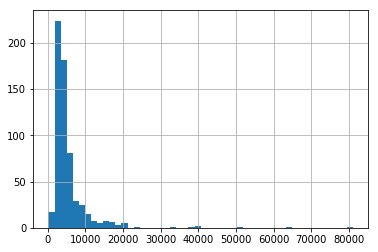

In [7]:
df['ApplicantIncome'].hist(bins=50)

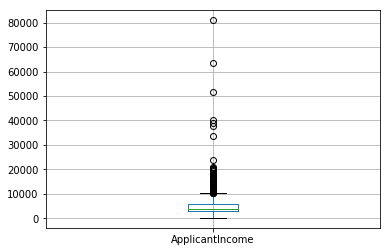

In [8]:
df.boxplot(column='ApplicantIncome')

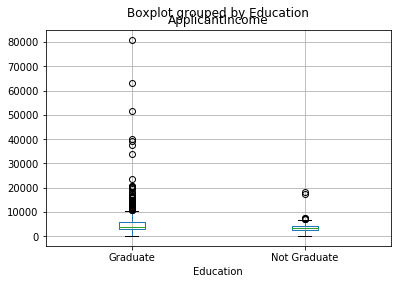

In [9]:
df.boxplot(column='ApplicantIncome', by = 'Education')

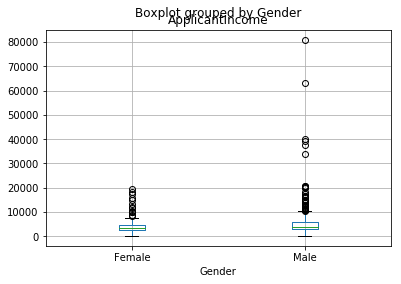

In [10]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

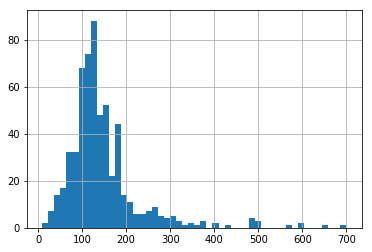

In [11]:
df['LoanAmount'].hist(bins=50)

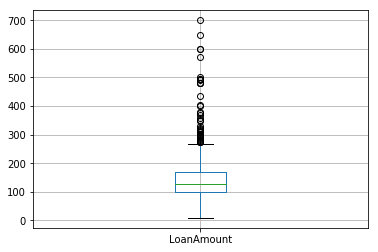

In [12]:
df.boxplot(column='LoanAmount')

In [31]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:') 
print (temp2)




Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789
                       Loan_Status
Credit_History Gender             
0.0            Female     0.058824
               Male       0.086957
1.0            Female     0.761905
               Male       0.803665


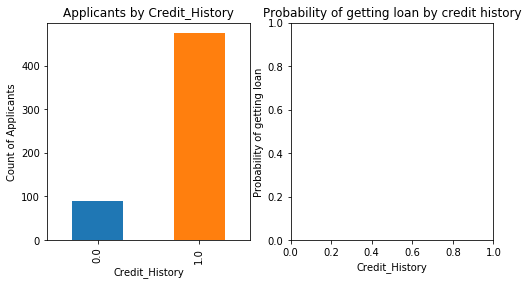

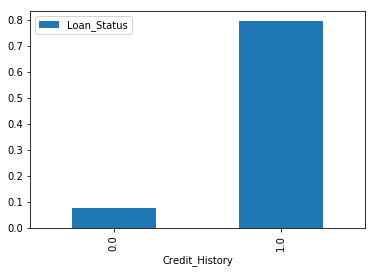

In [22]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)

ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
temp2.plot(kind = 'bar')

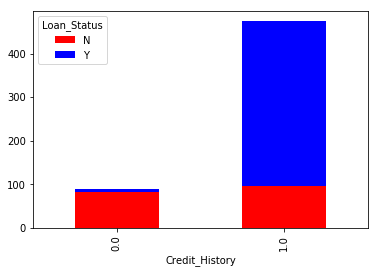

In [20]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [41]:


ttemp4 = df.pivot_table(values='Loan_Status',index=['Credit_History','Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print(temp4)
#temp4.plot(kind = 'bar')
#temp4 = pd.crosstab(df['Credit_History'], df['Gender'])
#temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)


Gender          Female  Male
Credit_History              
0.0                 17    69
1.0                 84   382


In [66]:
#find missing values
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [62]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [72]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [73]:

df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [83]:
mode(['yes','no','yes']).mode[0]

c:\users\dhiman\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


'yes'

In [84]:
#df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Self_Employed'].fillna('No',inplace=True)
df['Gender'].fillna(mode(df['Gender']).mode[0], inplace=True)
#df['Married'].fillna(mode(df['Married']).mode[0], inplace=True)
#df['Self_Employed'].fillna(df(df['Self_Employed']).mode[0], inplace=True)
mode(df['Gender'])

c:\users\dhiman\anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


TypeError: '<' not supported between instances of 'str' and 'float'

In [65]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]

# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

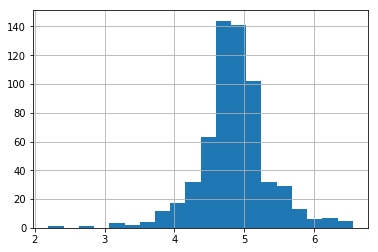

In [69]:
 df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

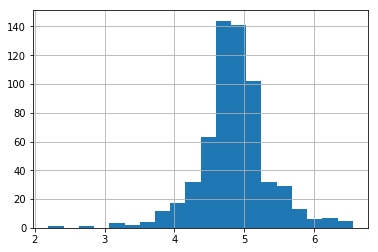

In [70]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [4]:
# count unique values of columns

for f in train.columns:
    df = len(train[f].unique())
    if df < 12 : 
        print('Column1 <' + str(f) + '> contains <'+ str(train[f].unique())+'> unique values')
    else :
        print('Column <' + str(f) + '> contains <'+ str(df)  +'> unique values')


Column <Loan_ID> contains <614> unique values
Column1 <Gender> contains <['Male' 'Female' nan]> unique values
Column1 <Married> contains <['No' 'Yes' nan]> unique values
Column1 <Dependents> contains <['0' '1' '2' '3+' nan]> unique values
Column1 <Education> contains <['Graduate' 'Not Graduate']> unique values
Column1 <Self_Employed> contains <['No' 'Yes' nan]> unique values
Column <ApplicantIncome> contains <505> unique values
Column <CoapplicantIncome> contains <287> unique values
Column <LoanAmount> contains <204> unique values
Column1 <Loan_Amount_Term> contains <[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]> unique values
Column1 <Credit_History> contains <[ 1.  0. nan]> unique values
Column1 <Property_Area> contains <['Urban' 'Rural' 'Semiurban']> unique values
Column1 <Loan_Status> contains <['Y' 'N']> unique values


In [ ]:
# DOUBTS
# is credit_history category or bindary or interval variable?
# is gender, married etc. are careorical or binary variable?
# is dependents is a oridnal varialble or categorical variable
# is loan status is binary or categorical variable?

In [5]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'Loan_Status':
        role = 'target'
    elif f == 'Loan_ID':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if f == 'Gender' or f == 'Married' or f == 'Education' or f == 'Self_Employed' or f == 'Property_Area' or f == 'Loan_ID' or f == 'Dependents':
        level = 'nominal' 
    elif f == 'Loan_Status' :
        level = 'binary'
    elif train[f].dtype == 'float64':
        level = 'interval'
    elif train[f].dtype == 'int64':
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'Loan_ID':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)
meta

,role,level,keep,dtype
varname,,,,
Loan_ID,id,nominal,False,object
Gender,input,nominal,True,object
Married,input,nominal,True,object
Dependents,input,nominal,True,object
Education,input,nominal,True,object
Self_Employed,input,nominal,True,object
ApplicantIncome,input,ordinal,True,int64
CoapplicantIncome,input,interval,True,float64
LoanAmount,input,interval,True,float64


In [22]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()
# scaling need to be applied for interval variables


,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,564.000000
mean,1621.245798,146.412162,342.000000,0.842199
std,2926.248369,84.037468,64.372489,0.364878
min,0.000000,9.000000,12.000000,0.000000
25%,0.000000,100.250000,360.000000,1.000000
50%,1188.500000,129.000000,360.000000,1.000000
75%,2297.250000,164.750000,360.000000,1.000000
max,41667.000000,700.000000,480.000000,1.000000


In [7]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ApplicantIncome
count,614.000000
mean,5403.459283
std,6109.041673
min,150.000000
25%,2877.500000
50%,3812.500000
75%,5795.000000
max,81000.000000


In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
vars_with_missing = []

for f in train.columns:
    missings = sum(pd.isnull(train[f]))
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

# DOUBTS
# how to handle missing values for gender,married,dependents,self employed,credithistory variables?

Variable Gender has 13 records (2.12%) with missing values
Variable Married has 3 records (0.49%) with missing values
Variable Dependents has 15 records (2.44%) with missing values
Variable Self_Employed has 32 records (5.21%) with missing values
Variable Credit_History has 50 records (8.14%) with missing values
In total, there are 5 variables with missing values


In [69]:
'''- **ps_car_03_cat and ps_car_05_cat** have a large proportion of  records with missing values. Remove these variables.
- For the other categorical variables with missing values, we can leave the missing value -1 as such.
- **ps_reg_03** (continuous/interval) has missing values for 18% of all records. Replace by the mean.
- **ps_car_11** (ordinal) has only 5 records with misisng values. Replace by the mode.
- **ps_car_12** (continuous) has only 1 records with missing value. Replace by the mean.
- **ps_car_14** (continuous) has missing values for 7% of all records. Replace by the mean.'''

'- **ps_car_03_cat and ps_car_05_cat** have a large proportion of  records with missing values. Remove these variables.\n- For the other categorical variables with missing values, we can leave the missing value -1 as such.\n- **ps_reg_03** (continuous) has missing values for 18% of all records. Replace by the mean.\n- **ps_car_11** (ordinal) has only 5 records with misisng values. Replace by the mode.\n- **ps_car_12** (continuous) has only 1 records with missing value. Replace by the mean.\n- **ps_car_14** (continuous) has missing values for 7% of all records. Replace by the mean.'

In [23]:
# Imputing with the mean or mode
mean_imp = Imputer(strategy='mean', axis=0)
mode_imp = Imputer(strategy='most_frequent', axis=0)
train['LoanAmount'] = mean_imp.fit_transform(train[['LoanAmount']]).ravel()
train['Loan_Amount_Term'] = mean_imp.fit_transform(train[['Loan_Amount_Term']]).ravel()
train['Credit_History'] = mode_imp.fit_transform(train[['Credit_History']]).ravel()



In [14]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable Gender has 2 distinct values
Variable Married has 2 distinct values
Variable Dependents has 4 distinct values
Variable Education has 2 distinct values
Variable Self_Employed has 2 distinct values
Variable Property_Area has 3 distinct values


In [15]:
#factorize nominal variables
#v = meta[(meta.level == 'nominal') & (meta.keep)].index

#for f in v:
    #print(pd.factorize(train[f]))
f='Loan_Status'
train[[f]] = train[[f]].apply(lambda x: pd.factorize(x)[0])



In [16]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0


<Figure size 432x288 with 0 Axes>

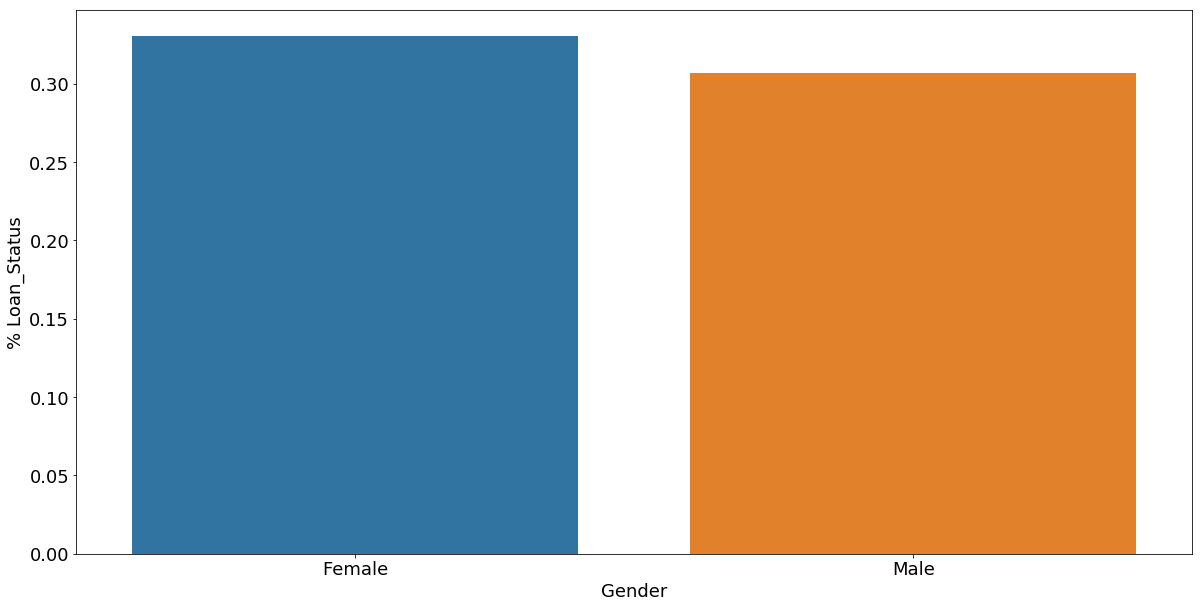

<Figure size 432x288 with 0 Axes>

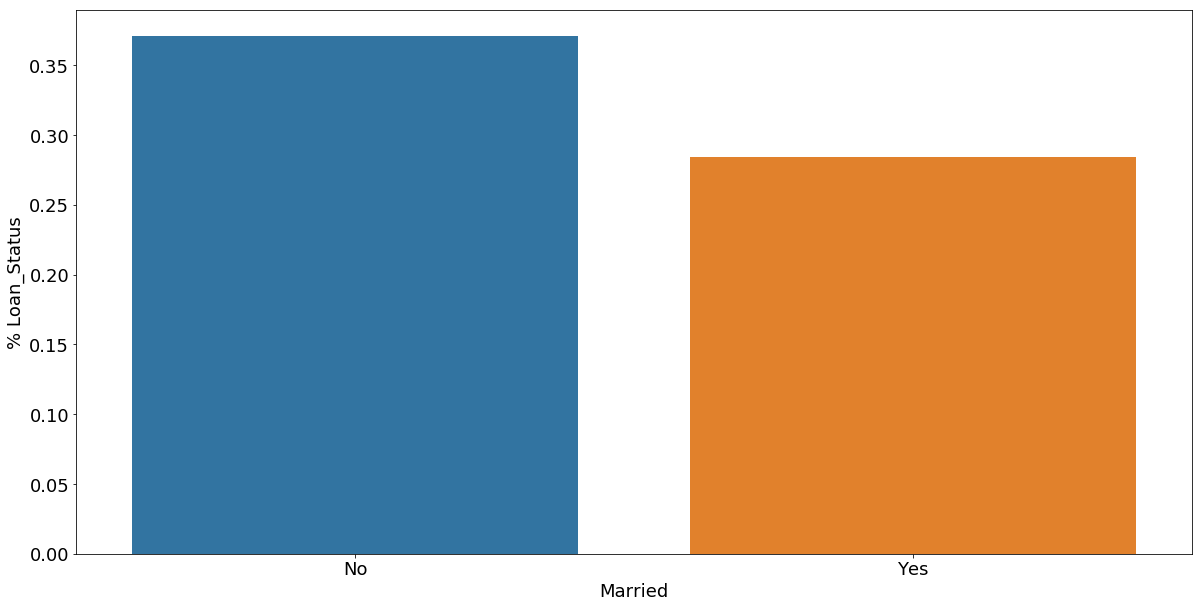

<Figure size 432x288 with 0 Axes>

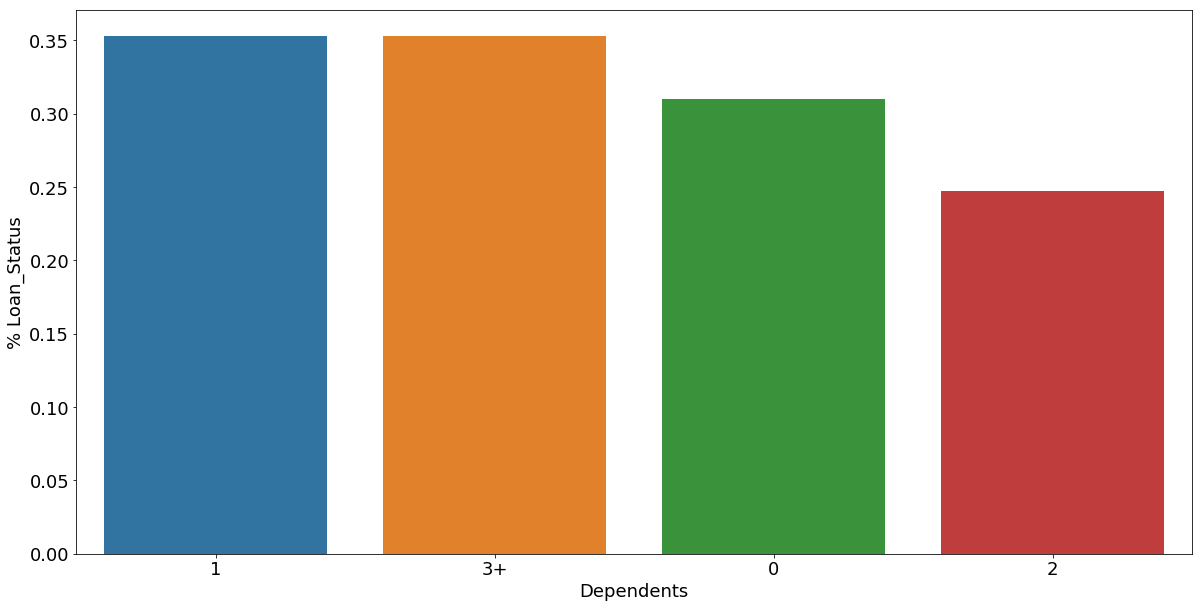

<Figure size 432x288 with 0 Axes>

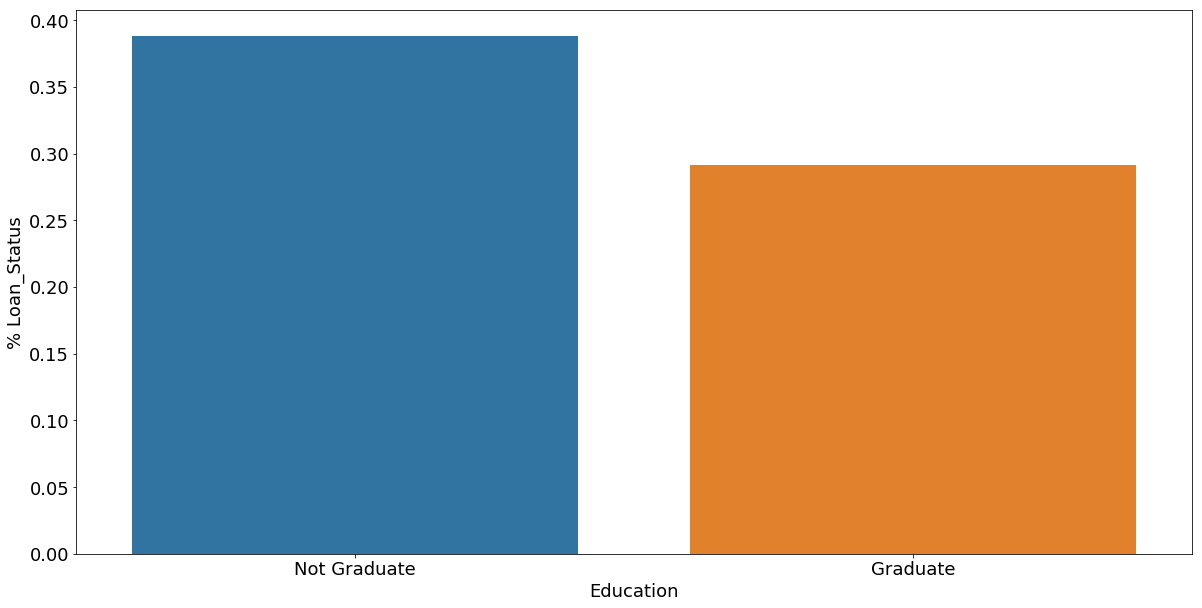

<Figure size 432x288 with 0 Axes>

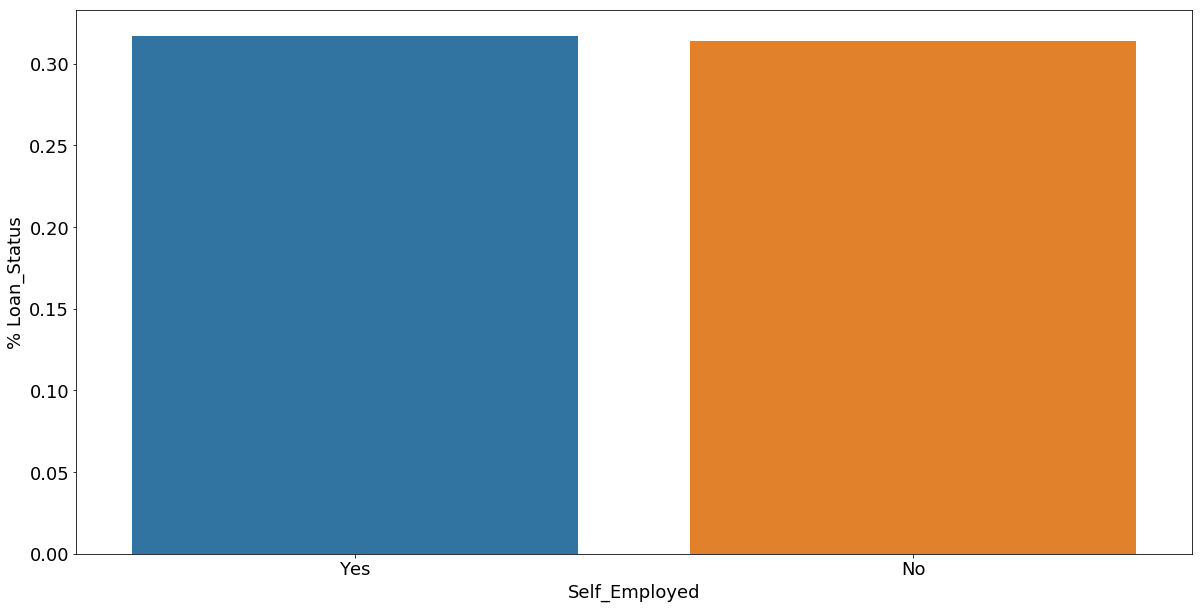

<Figure size 432x288 with 0 Axes>

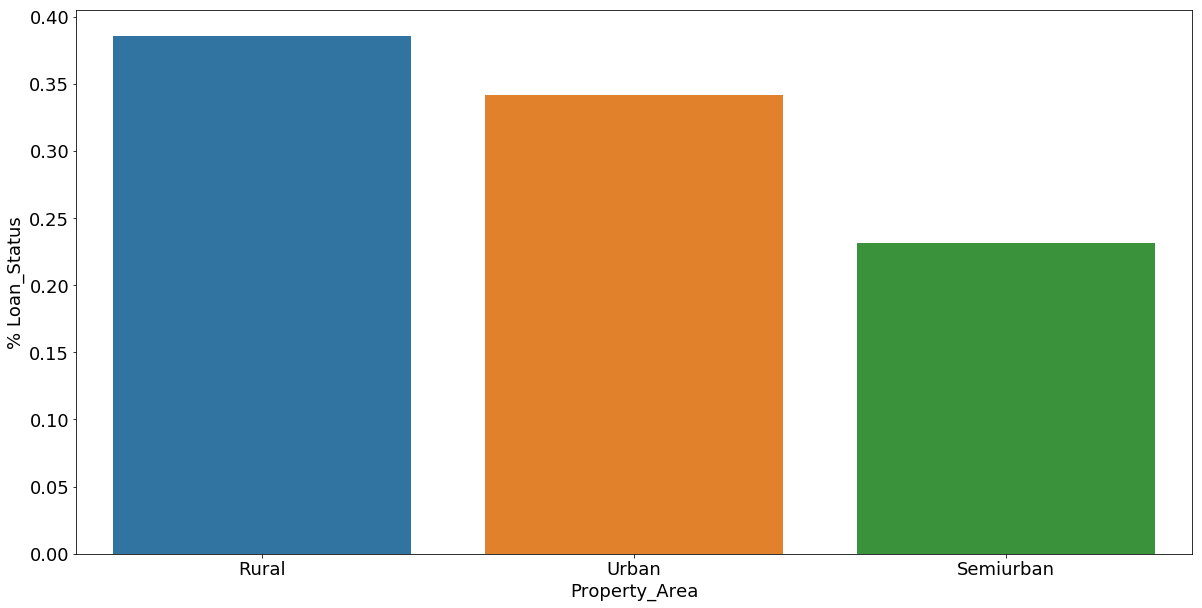

In [17]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'Loan_Status']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='Loan_Status', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='Loan_Status', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% Loan_Status', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

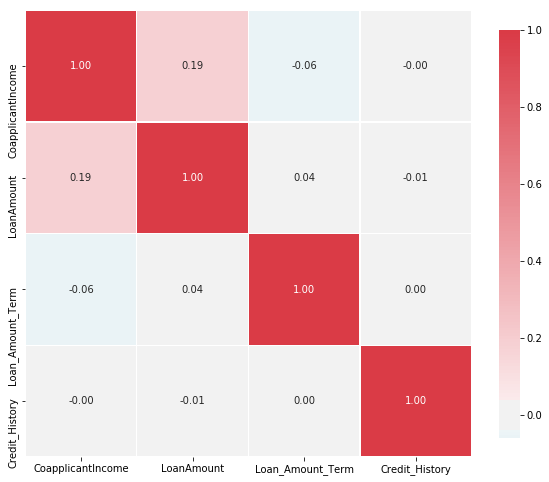

In [18]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

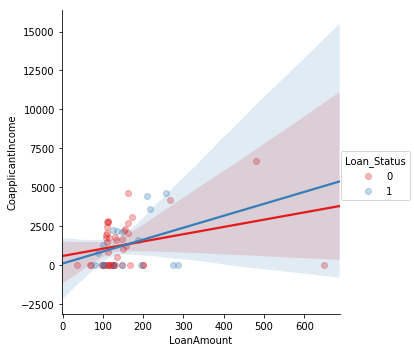

In [19]:
s = train.sample(frac=0.1)
sns.lmplot(x='LoanAmount', y='CoapplicantIncome', data=s, hue='Loan_Status', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

In [20]:
#Creating dummy variables
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 13 variables in train
After dummification we have 16 variables in train


In [24]:
#Creating intraction variables
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 16 variables in train
After creating interactions we have 26 variables in train


In [25]:
train.head()


,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,CoapplicantIncome^2,CoapplicantIncome LoanAmount,CoapplicantIncome Loan_Amount_Term,CoapplicantIncome Credit_History,LoanAmount^2,LoanAmount Loan_Amount_Term,LoanAmount Credit_History,Loan_Amount_Term^2,Loan_Amount_Term Credit_History,Credit_History^2
0,LP001002,5849,0.0,146.412162,360.0,1.0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,21436.521229,52708.378378,146.412162,129600.0,360.0,1.0
1,LP001003,4583,1508.0,128.000000,360.0,1.0,1,1,1,1,0,0,0,0,0,0,2274064.0,193024.0,542880.0,1508.0,16384.000000,46080.000000,128.000000,129600.0,360.0,1.0
2,LP001005,3000,0.0,66.000000,360.0,1.0,0,1,1,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,4356.000000,23760.000000,66.000000,129600.0,360.0,1.0
3,LP001006,2583,2358.0,120.000000,360.0,1.0,0,1,1,0,0,0,1,0,0,1,5560164.0,282960.0,848880.0,2358.0,14400.000000,43200.000000,120.000000,129600.0,360.0,1.0
4,LP001008,6000,0.0,141.000000,360.0,1.0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,19881.000000,50760.000000,141.000000,129600.0,360.0,1.0


In [26]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['Loan_ID', 'Loan_Status'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['Loan_ID', 'Loan_Status'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

0 variables have too low variance.
These variables are []


In [27]:


X_train = train.drop(['Loan_ID', 'Loan_Status'], axis=1)
y_train = train['Loan_Status']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))



 1) LoanAmount Credit_History      0.136048
 2) ApplicantIncome                0.099687
 3) Loan_Amount_Term Credit_History 0.091831
 4) LoanAmount Loan_Amount_Term    0.070837
 5) LoanAmount                     0.067470
 6) LoanAmount^2                   0.067326
 7) Credit_History                 0.063230
 8) Credit_History^2               0.058138
 9) CoapplicantIncome Credit_History 0.043045
10) CoapplicantIncome LoanAmount   0.040034
11) CoapplicantIncome Loan_Amount_Term 0.038532
12) CoapplicantIncome              0.037134
13) CoapplicantIncome^2            0.036746
14) Property_Area_Semiurban        0.019201
15) Married_Yes                    0.017434
16) Education_Not Graduate         0.015440
17) Dependents_1                   0.014757
18) Property_Area_Urban            0.014710
19) Loan_Amount_Term^2             0.014332
20) Loan_Amount_Term               0.012895
21) Gender_Male                    0.012624
22) Self_Employed_Yes              0.010902
23) Dependents_2         

In [28]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 24
Number of features after selection: 12


In [34]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['Loan_ID','Loan_Status'], axis=1))
train.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,CoapplicantIncome^2,CoapplicantIncome LoanAmount,CoapplicantIncome Loan_Amount_Term,CoapplicantIncome Credit_History,LoanAmount^2,LoanAmount Loan_Amount_Term,LoanAmount Credit_History,Loan_Amount_Term^2,Loan_Amount_Term Credit_History,Credit_History^2
0,LP001002,5849,0.0,146.412162,360.0,1.0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,21436.521229,52708.378378,146.412162,129600.0,360.0,1.0
1,LP001003,4583,1508.0,128.000000,360.0,1.0,1,1,1,1,0,0,0,0,0,0,2274064.0,193024.0,542880.0,1508.0,16384.000000,46080.000000,128.000000,129600.0,360.0,1.0
2,LP001005,3000,0.0,66.000000,360.0,1.0,0,1,1,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,4356.000000,23760.000000,66.000000,129600.0,360.0,1.0
3,LP001006,2583,2358.0,120.000000,360.0,1.0,0,1,1,0,0,0,1,0,0,1,5560164.0,282960.0,848880.0,2358.0,14400.000000,43200.000000,120.000000,129600.0,360.0,1.0
4,LP001008,6000,0.0,141.000000,360.0,1.0,0,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,19881.000000,50760.000000,141.000000,129600.0,360.0,1.0
